# 피마족 인디언 당뇨병 발생 유무를 예측하는 이진 분류

*   당뇨병발생 (1), 정상(0)
*   



## 데이터 준비

In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import mse

from sklearn.model_selection import train_test_split

np.random.seed(5)  # 값이 흔들리는 것 방지, 랜덤시드 고정

In [3]:
dataset = pd.read_csv("/content/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## outcome 컬럼(label) 비율 확인

In [5]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

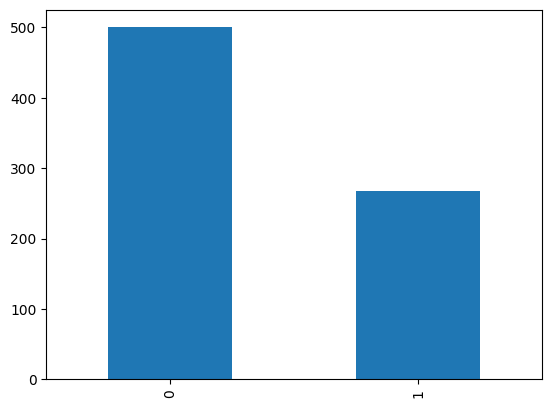

In [6]:
dataset['Outcome'].value_counts().plot.bar();

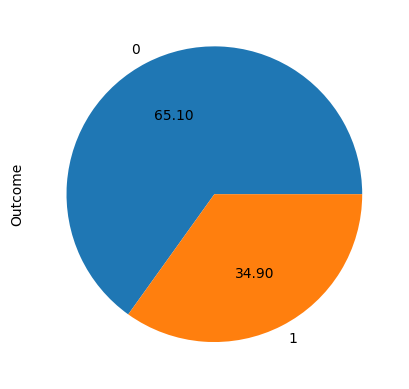

In [7]:
dataset['Outcome'].value_counts().plot.pie(autopct='%.2f');

데이터 분리하기

### X,y 데이터 분리하기

In [8]:
dataset.columns[-1]

'Outcome'

In [9]:
dataset.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
dataset[dataset.columns[-1]]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
X = dataset[dataset.columns[:-1]]

In [12]:
y = dataset[dataset.columns[-1]]

### 훈련셋과 테스트 셋으로 분리하기

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7, stratify=y)

print('X_Train.shape', X_train.shape)
print('X_Test.shape', X_test.shape)

X_Train.shape (614, 8)
X_Test.shape (154, 8)


In [14]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [16]:
import tensorflow as tf

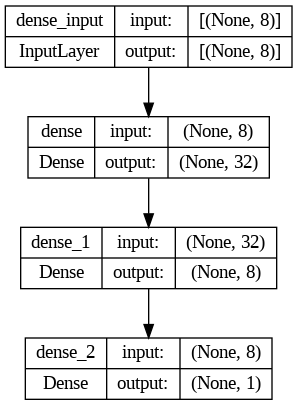

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

## 모델 설정하기

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

## 모델 학습하기

In [19]:
history = model.fit(X_train, y_train, epochs=1500, batch_size=128)

Epoch 1/1500
5/5 [==============================] - 2s 14ms/step - loss: 12.2035 - acc: 0.6498
Epoch 2/1500
5/5 [==============================] - 0s 5ms/step - loss: 8.8466 - acc: 0.6498
Epoch 3/1500
5/5 [==============================] - 0s 7ms/step - loss: 6.3799 - acc: 0.6531
Epoch 4/1500
5/5 [==============================] - 0s 9ms/step - loss: 4.7811 - acc: 0.6531
Epoch 5/1500
5/5 [==============================] - 0s 6ms/step - loss: 3.7415 - acc: 0.6384
Epoch 6/1500
5/5 [==============================] - 0s 5ms/step - loss: 3.0778 - acc: 0.6254
Epoch 7/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.5782 - acc: 0.5961
Epoch 8/1500
5/5 [==============================] - 0s 10ms/step - loss: 2.2307 - acc: 0.5684
Epoch 9/1500
5/5 [==============================] - 0s 8ms/step - loss: 1.9926 - acc: 0.5537
Epoch 10/1500
5/5 [==============================] - 0s 5ms/step - loss: 1.7745 - acc: 0.5391
Epoch 11/1500
5/5 [==============================] - 0s 9ms/step -

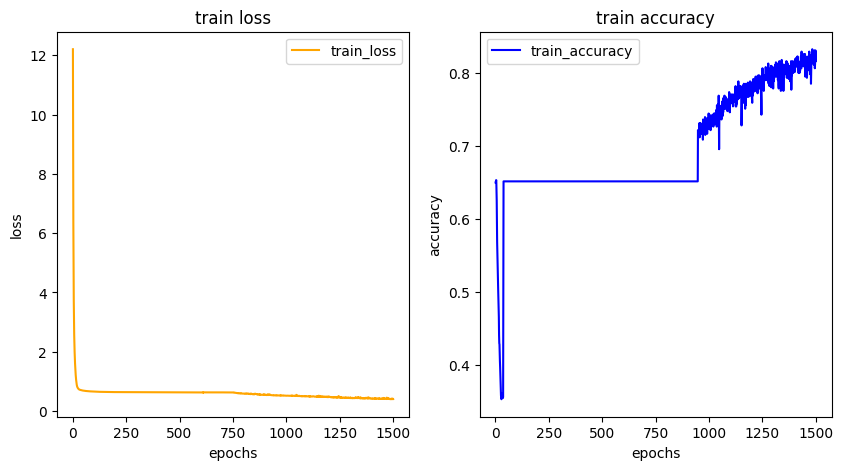

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## 모델 평가하기

In [21]:
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5589 - acc: 0.7208
acc: 72.08%


In [22]:
scores

[0.5588629841804504, 0.7207792401313782]

## 성능평가

In [23]:
from sklearn import metrics

y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 3ms/step


array([[3.51839443e-03],
       [8.61032531e-02],
       [4.72511761e-02],
       [8.05211887e-02],
       [8.40154141e-02],
       [3.12334276e-03],
       [1.85195431e-02],
       [6.83554173e-01],
       [6.84991553e-02],
       [8.18945393e-02],
       [2.41939589e-01],
       [6.87277198e-01],
       [1.95910469e-01],
       [3.51370782e-01],
       [6.55443490e-01],
       [3.12516540e-01],
       [5.81526339e-01],
       [8.02729204e-02],
       [2.66885728e-01],
       [2.88361669e-01],
       [3.04022521e-01],
       [6.87277198e-01],
       [3.84386003e-01],
       [6.87277198e-01],
       [6.02480352e-01],
       [6.87277198e-01],
       [4.38880652e-01],
       [2.91945934e-02],
       [6.65971637e-02],
       [6.87277198e-01],
       [6.87277198e-01],
       [6.87277198e-01],
       [2.59377003e-01],
       [6.87277198e-01],
       [5.73176444e-01],
       [5.79075143e-02],
       [1.98923051e-01],
       [6.87277198e-01],
       [4.62690324e-01],
       [3.95603597e-01],


In [24]:
y_pred = model.predict(X_test)
preds_1d = y_pred.flatten()
pred_class = np.where(preds_1d > 0.5, 1, 0)# 0.5보다 크면1, 작으면 0

pred_class

print('accuracy : ', metrics.accuracy_score(y_test, pred_class))
print('precision : ', metrics.precision_score(y_test, pred_class))
print('recall : ', metrics.recall_score(y_test, pred_class))
print('f1 : ', metrics.f1_score(y_test, pred_class))

5/5 [==============================] - 0s 3ms/step
accuracy :  0.7207792207792207
precision :  0.6
recall :  0.6111111111111112
f1 :  0.6055045871559633


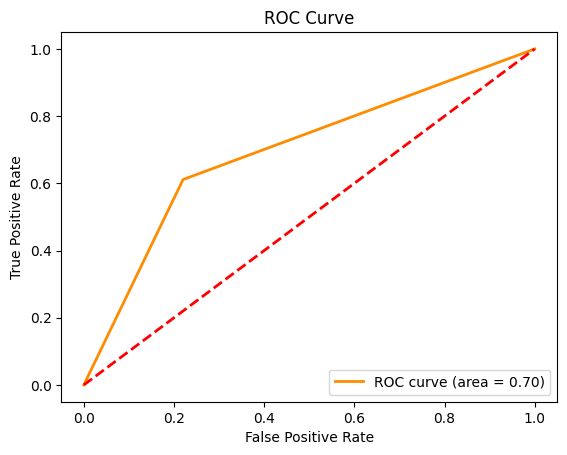

In [25]:
from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_test, pred_class)

auc_A = auc(fpr_A, tpr_A)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()